# Unsupervised ML
## Clustering
Clustering means grouping things which are similar or have same features in common and so is the purpose of K-mean clustering
### k-Means clustering
Is and unsuperviseed ML algorithm for clustering n Observations into K clusters where K is pre or User Defined, The main idea is to define K centriod one for each cluster


In [28]:
#impot librariess

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
#importing the dataset
dataset = pd.read_csv("C:/Users/dell/Documents/DSN data science/Mall_Customers.csv", delimiter = ',')

#C:\Users\dell\Documents\DSN data science\Machine Learning Dataset

You own a supermarket mall and have some basic data about your customers

* Customer ID
* Age
* Gender
* Annual Income
* and Spending Score

The closer the **Spending Score**  gets to 100 the more the customer spends, it is something you apply to customers based on your defined parameters like **CUstomer behaiour and Purschase date

#### Problem Statment
You own the mall and wants to understand the customers who can easily be targeted for new stock of goods, so that the insight can be given to the marketing team to plan accordingly.






In [30]:
#to check the No of Columns, the datatype, and size of data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [31]:
#Next we check if there are any missing values
dataset.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [32]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [33]:
#The Gender column is mistakenly name Genre, we have to rename
dataset.rename({'Genre': 'Gender'}, axis = 1, inplace = True)

In [34]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
#Value count of Gender column, sount ing the counting each values
dataset['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [36]:
#converting string values in Gender column to numerical by importing label encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() 
#invoking fit transform on object

dataset['Gender'] = le.fit_transform(dataset['Gender'])

dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [37]:
#checking/reconfirming the datatypes
dataset.dtypes

CustomerID                int64
Gender                    int32
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [38]:
#reconfirming the value counts 
dataset['Gender'].value_counts()

Gender
0    112
1     88
Name: count, dtype: int64

<Axes: title={'center': 'Count of Male & Female'}, xlabel='Gender', ylabel='count'>

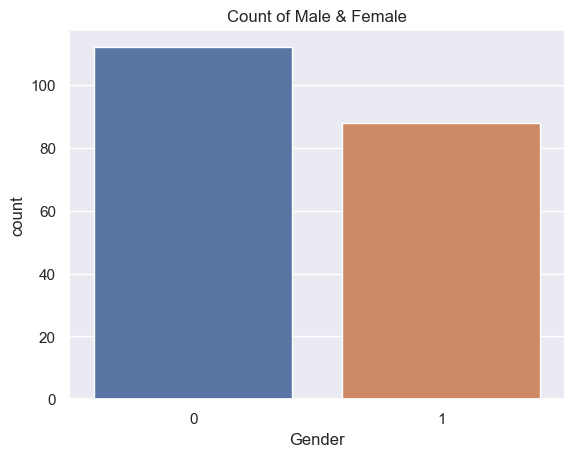

In [39]:
#visualizing our dataset, plot of Count of male and female
plt.title('Count of Male & Female')
sns.set(style = 'darkgrid')
sns.countplot(x = dataset['Gender'])

In [40]:
#descriptive statistics of the dataset
dataset.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


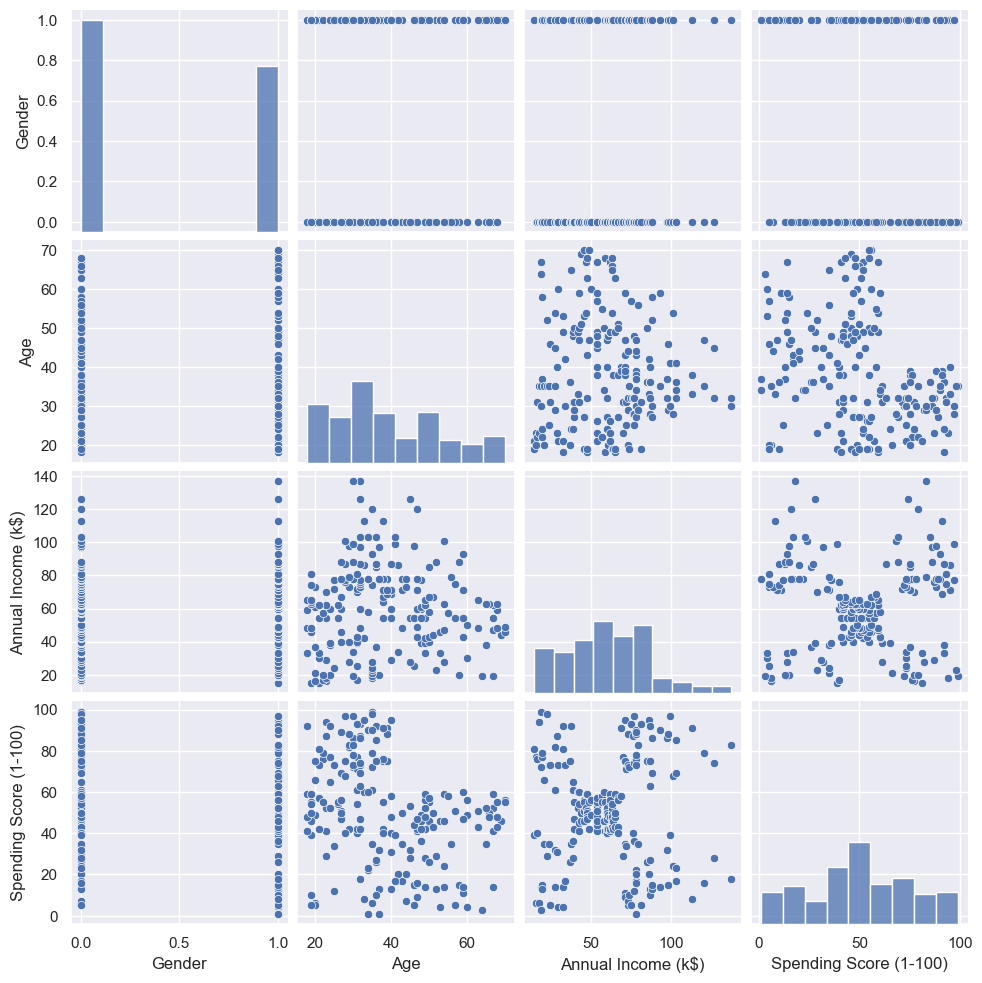

In [41]:
# Finding correlation between features of the dataset
sns.pairplot(dataset.iloc[:, 1:5])

## Indentifiable conclusion from the pairplot
the pair plot shows the middle age made more income and youngest age grade spend the most, thus they are a good target to focus for the new product,spending and earning are more or less uniform for both genders

In [42]:
x = dataset.iloc[:,[3,4]]
x.head() 

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Finding the best value of  K will as a data scientist

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

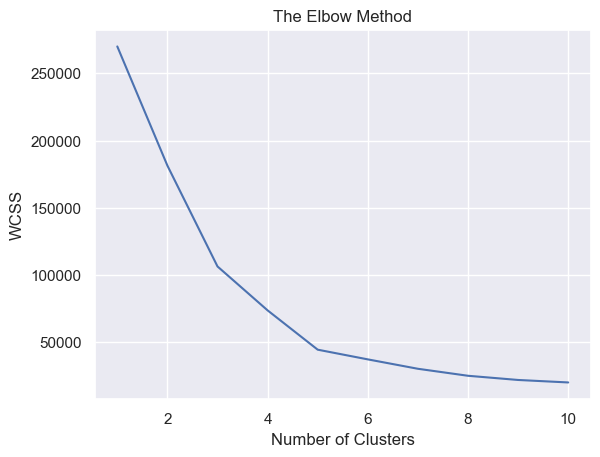

In [43]:
#Using the Elbow method to find the optimal number of cluster
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11): #Test 1 to 10different clusters
#loop over the indented statemnets, 10 times to see how distance reduce till it becomes steady
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)  #train the model for all 10 clusters and append into wcss list

    '''Kmean.fit(x) generate the following parameters:
    Kmeam9(algorithm='auto',copy_x=True, init = 'km-means**', max_iter =300, n_clusters=5, n_init =10, n_jobs=1,precompute_dista
    inertia: sum of squared distnce of samples to their closest cluster center'''
    
    wcss.append(kmeans.inertia_) #add each of the sum sqaured dsitance to wcss[] list
    

plt.plot(range(1, 11), wcss) #plot the ten different wcss against the no of clusters
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

#### The sum of squared distance started to stablize from the eth cluster, therefore the best no of (K) clusterin this task is 5

In [44]:
#fitting k-means too the dataset and predicting the cluster
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x)
#The predicted cluster centers are stored in y_kmeans

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [45]:
#adding the predicted clusters
x['Centroids'] = y_kmeans

#Now the different observations have been assigned to different cluster centers[Centroids]
x

C:\Users\dell\AppData\Local\Temp\ipykernel_10488\1275847770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Centroids'] = y_kmeans


,Annual Income (k$),Spending Score (1-100),Centroids
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3


## Visualizing the clusters
 

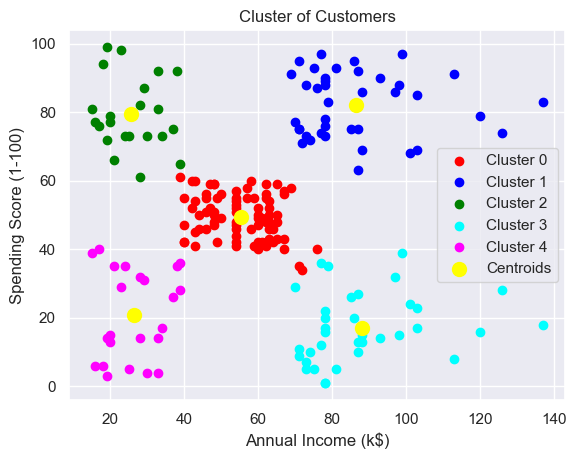

In [47]:
#unzip all values in x dataframe and store them in x(array)
X = x.values

# x[y_kmeans == 0,0] is a condition statement that prints the value of x[i]for all i to x
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0, 1], c = 'red', label = 'Cluster 0')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1, 1], c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2, 1], c = 'green', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3, 1], c = 'cyan', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4, 1], c = 'magenta', label = 'Cluster 4')
# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.title('Cluster of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [48]:
X

array([[ 15,  39,   4],
       [ 15,  81,   2],
       [ 16,   6,   4],
       [ 16,  77,   2],
       [ 17,  40,   4],
       [ 17,  76,   2],
       [ 18,   6,   4],
       [ 18,  94,   2],
       [ 19,   3,   4],
       [ 19,  72,   2],
       [ 19,  14,   4],
       [ 19,  99,   2],
       [ 20,  15,   4],
       [ 20,  77,   2],
       [ 20,  13,   4],
       [ 20,  79,   2],
       [ 21,  35,   4],
       [ 21,  66,   2],
       [ 23,  29,   4],
       [ 23,  98,   2],
       [ 24,  35,   4],
       [ 24,  73,   2],
       [ 25,   5,   4],
       [ 25,  73,   2],
       [ 28,  14,   4],
       [ 28,  82,   2],
       [ 28,  32,   4],
       [ 28,  61,   2],
       [ 29,  31,   4],
       [ 29,  87,   2],
       [ 30,   4,   4],
       [ 30,  73,   2],
       [ 33,   4,   4],
       [ 33,  92,   2],
       [ 33,  14,   4],
       [ 33,  81,   2],
       [ 34,  17,   4],
       [ 34,  73,   2],
       [ 37,  26,   4],
       [ 37,  75,   2],
       [ 38,  35,   4],
       [ 38,  92

In [50]:
print(X[0:5, :])
print("Data type of X =", type(X), 'With Shape', X.shape)
print("Data type of x Dataframe = ", type(x), 'With Shape', x.shape)

[[15 39  4]
 [15 81  2]
 [16  6  4]
 [16 77  2]
 [17 40  4]]
Data type of X = <class 'numpy.ndarray'> With Shape (200, 3)
Data type of x Dataframe =  <class 'pandas.core.frame.DataFrame'> With Shape (200, 3)


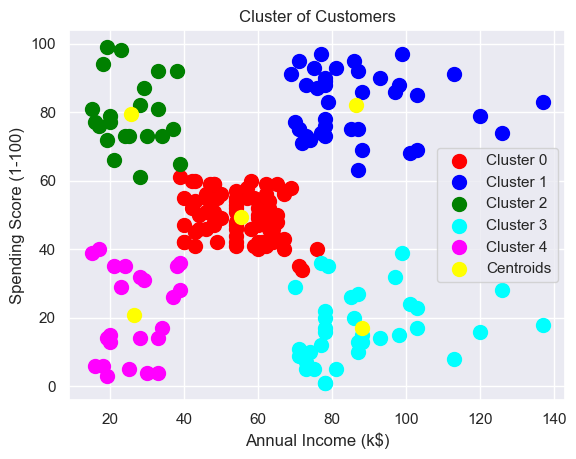

In [60]:
#for datapoints in cluster 0
Income_Cluster_0 = x[x.Centroids == 0]['Annual Income (k$)']
Spending_Score_Cluster_0 = x[x.Centroids == 0]['Spending Score (1-100)']
plt.scatter(Income_Cluster_0, Spending_Score_Cluster_0, s = 100, c ='red', label = 'Cluster 0')

#for datapoints in cluster 1
Income_Cluster_1 = x[x.Centroids == 1]['Annual Income (k$)']
Spending_Score_Cluster_1 = x[x.Centroids == 1]['Spending Score (1-100)']
plt.scatter(Income_Cluster_1, Spending_Score_Cluster_1, s = 100, c ='blue', label = 'Cluster 1')

#for datapoints in cluster 2
Income_Cluster_2 = x[x.Centroids == 2]['Annual Income (k$)']
Spending_Score_Cluster_2 = x[x.Centroids == 2]['Spending Score (1-100)']
plt.scatter(Income_Cluster_2, Spending_Score_Cluster_2, s = 100, c ='green', label = 'Cluster 2')

#for datapoints in cluster 3
Income_Cluster_3 = x[x.Centroids == 3]['Annual Income (k$)']
Spending_Score_Cluster_3 = x[x.Centroids == 3]['Spending Score (1-100)']
plt.scatter(Income_Cluster_3, Spending_Score_Cluster_3, s = 100, c ='cyan', label = 'Cluster 3')

#for datapoints in cluster 4
Income_Cluster_4 = x[x.Centroids == 4]['Annual Income (k$)']
Spending_Score_Cluster_4 = x[x.Centroids == 4]['Spending Score (1-100)']
plt.scatter(Income_Cluster_4, Spending_Score_Cluster_4, s = 100, c ='magenta', label = 'Cluster 4')

# Plot all cluster centroids on their converged datapoints
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')

#Give the figure a titl called clusters of centroids
plt.title('Cluster of Customers')

#Name the x-axis as Annual Income (k$)
plt.xlabel('Annual Income (k$)')

#Name the y-axis asSpending Score (1-100)'
plt.ylabel('Spending Score (1-100)')

#plot all labels in various scatter points
plt.legend()

#show all plots
plt.show()